Librerías

In [16]:
import pandas as pd
data_csv = "D:\DataScience\Yakomo\Estadística Práctica\Materiales\data\state.csv"
df = pd.read_csv(data_csv)

Muestra

In [17]:
df.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


Diferentes Percentiles de la Tasa de Homicidios

In [18]:
df[["Murder.Rate"]].quantile([0.05,0.25,0.5,0.75,0.95]).T

,0.05,0.25,0.50,0.75,0.95
Murder.Rate,1.6,2.425,4.0,5.55,6.51


Los Diagramas de Caja o de Bigotes

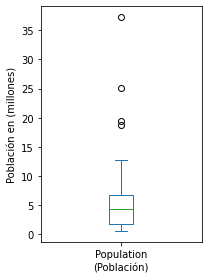

In [29]:
import matplotlib.pyplot as plt
#Tomaremos como referencia los millones 1_000_000
ax = (df["Population"]/1_000_000).plot.box(figsize=(3, 4))
ax.set_ylabel('Población en (millones)')
plt.xlabel("(Población)")
plt.tight_layout()
plt.show()

Los Límites de los Bigotes no van más allá que 1.5 veces el rango intercuantílico.

In [51]:
#En esta caso: 
iqr = df["Population"].quantile(0.75) - df["Population"].quantile(0.25)
iqr * 1.5

7270962.0

# Explicación del Diagrama

* La línea "Verde" entre la caja indica la "mediana" de la población por estados que es de alrededor 5 millones.
* La Caja entera representa desde abajo el percentil 25 al 75, (superior de la caja), que van aproximadamente entre 2 millones y 7 millones.
* Los bigotes representan un rango Z = [P25 - 1.5RI, P75 + 1.5RI], donde IR es el Rango Intercuantílico. 
* Los extremos de los bigotes son los mínimos y máximos que no son valores atípicos osea que pertenecen al Rango Pertimitido Z. 
* Los datos que aparecen fuera de los bigotes se representan como círculos y son considerados valores atípicos, osea no pertenecen a Z. 

Tabla de Frecuencias o Histogramas

In [61]:
#Una idea de como se hace el histograma
binnedPopulation = pd.cut(df["Population"],10)
binnedPopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

Aplicando el Histograma - Graficando frecuencias. 

* Se grafican en intervalos su frecuencia.

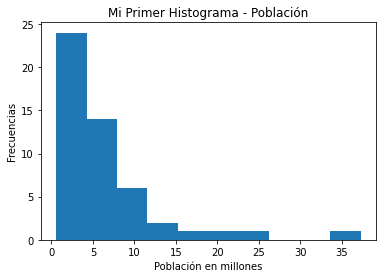

In [73]:
#El "X" es el dato y el "Y" su frecuencia.
ax = (df["Population"]/1000000).plot.hist()
ax.set_xlabel("Población en millones")
ax.set_ylabel("Frecuencias")
plt.title("Mi Primer Histograma - Población")
plt.show()

* Los contenedores o rango vacíos se incluyen en el gráfico.
* Los contenedores tienen la misma anchura
* El número de contenedores depende del usuario.
* No existe espacios vacíos entre barras salvo que un contenedor no posea frecuencias o esté vacío.

# Curtosis

* Si la curtosis es negativa o cercana su distribución es normal
* Si la curtosis es positiva los datos se concentran en la media es más puntiaguda
* Si la curtosis es negatica los datos tienden a no concentrarse en la media y sería más achatada

In [74]:
#En este caso es positiva y se concentra alrededor de "5" media
df["Population"].kurt()

8.722114728161502

# Asimetría

* Si es 0 la distribución es simétrica
* Si es positiva la distribución es asimétrica a la derecha (derecha menos)
* Si es negativa la distribución es asimétrica a la izquierda, (izquierda menos)

In [75]:
#En este caso es positiva, asimétrica a la derecha
df["Population"].skew()

2.6426346412748765

Diagrama y estimación de la curva de densidad

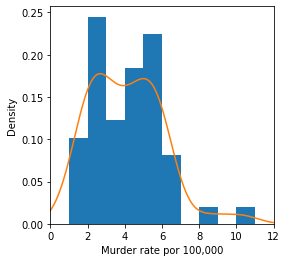

In [88]:
ax = df["Murder.Rate"].plot.hist(density = True, xlim=[0,12],bins =range(1,12),figsize=(4,4))
df["Murder.Rate"].plot.density(ax=ax)
ax.set_xlabel("Murder rate por 100,000")
plt.show()

* Para la ciencia de datos no es necesaio hacer estimaciones de la densidad, nos basta con emplear la funciones básicas.

# Resumen

* El Histograma es un gráfico de frecuencias, de cuantas veces aparece una variable "x", esto siendo el eje "y".
* Proporciona una ideal visual de la distribución de los datos
* La tabla de frecuencias es una versión tabular. 
* Un diagrama de cajas o bigotes nos da una idea rápida de la distribución de los datos, visualmente sirve para comparar.
* El diagrama de densidad es una forma suavizada del histograma. 